<a href="https://colab.research.google.com/github/RangalaDhanalaxmi/Datasets/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Written Digit Prediction - Classification Analysis**


**objective**

Handwritten Digit Prediction - Classification Analysis is to develop a highly accurate machine learning model that can classify handwritten digits (0-9) with precision and recall. The model should generalize well to new data, avoid overfitting, and be deployable in real-world applications, such as optical character recognition systems.

**Data Source**

sklearn.datasets

**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


**Import Data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
data = load_digits()

**Describe Data**

In [ ]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

**Data Visualization**

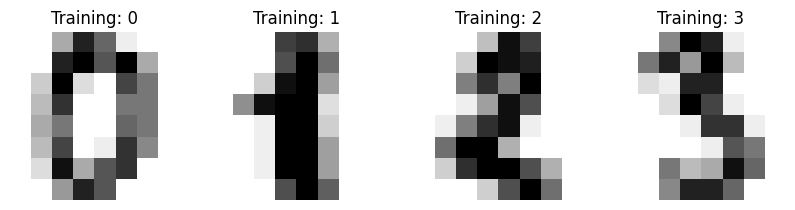

In [ ]:

fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,img,label in zip(axes,data.images,data.target):
    ax.set_axis_off()
    ax.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title("Training: %i"% (label))

**Data Preprocessing**

In [ ]:
data.images.shape

(1797, 8, 8)

In [ ]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
data.images[0].shape

(8, 8)

In [ ]:
len(data.images)

1797

In [ ]:
n_samples = len(data.images)
m_data = data.images.reshape((n_samples,-1))

In [ ]:
m_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
m_data[0].shape

(64,)

In [ ]:
m_data.shape

(1797, 64)

**Define Target Variable (y) and Feature Variables (X)**

In [ ]:
m_data = m_data/16

In [ ]:
X = m_data
y = data.target

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m_data,data.target,test_size=0.3)



In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Modeling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

**Model Evaluation**

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

**Prediction**

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([1, 1, 3, 6, 7, 8, 4, 7, 5, 3, 5, 5, 2, 0, 3, 1, 2, 1, 8, 7, 1, 8,
       2, 9, 7, 1, 8, 6, 9, 4, 5, 7, 8, 9, 2, 9, 2, 2, 4, 1, 9, 4, 4, 6,
       6, 7, 3, 1, 5, 5, 1, 7, 6, 5, 2, 8, 9, 7, 0, 3, 0, 8, 0, 7, 2, 5,
       5, 1, 8, 0, 3, 2, 5, 0, 6, 2, 7, 8, 6, 8, 4, 3, 0, 9, 8, 1, 1, 7,
       0, 2, 0, 1, 4, 6, 2, 2, 0, 9, 9, 9, 2, 2, 6, 0, 7, 2, 0, 2, 9, 3,
       8, 9, 2, 5, 3, 2, 2, 3, 6, 1, 5, 5, 3, 7, 5, 6, 4, 3, 0, 1, 2, 9,
       3, 1, 3, 9, 6, 0, 8, 7, 9, 9, 0, 5, 1, 4, 6, 8, 7, 6, 0, 1, 0, 8,
       7, 1, 7, 8, 9, 5, 0, 2, 5, 6, 8, 4, 6, 2, 4, 3, 6, 4, 9, 7, 1, 3,
       6, 9, 4, 3, 2, 0, 5, 3, 1, 4, 8, 5, 3, 8, 2, 0, 1, 7, 8, 5, 6, 8,
       3, 1, 6, 0, 2, 8, 4, 7, 6, 1, 2, 7, 0, 7, 6, 3, 0, 9, 1, 6, 2, 3,
       1, 7, 4, 4, 3, 6, 5, 9, 9, 8, 5, 7, 5, 4, 9, 5, 2, 4, 4, 6, 8, 8,
       6, 0, 6, 5, 8, 4, 2, 9, 1, 3, 6, 6, 1, 2, 9, 4, 8, 6, 4, 2, 9, 6,
       0, 1, 9, 5, 2, 6, 3, 9, 7, 6, 3, 3, 2, 8, 1, 2, 5, 1, 2, 4, 4, 3,
       4, 5, 0, 8, 7, 0, 3, 8, 3, 8, 7, 4, 5, 4, 9,

**Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(predictions,y_test))

[[60  0  0  0  0  0  1  0  0  0]
 [ 0 63  0  0  0  0  0  0  1  0]
 [ 0  0 61  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  2  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 49  1  0  0  2]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  1  0  0  0 45]]


In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       1.00      0.98      0.99        64
           2       1.00      1.00      1.00        61
           3       1.00      0.97      0.98        58
           4       1.00      1.00      1.00        48
           5       0.98      0.94      0.96        52
           6       0.96      1.00      0.98        51
           7       1.00      0.98      0.99        49
           8       0.94      1.00      0.97        50
           9       0.94      0.98      0.96        46

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



**Explaination**



1.Firstly i import three libraries as follows: panadas,numpy,matplotib.pyplot

2.Secondly imported the data from datasource sklearn.datasets and load it.

3.After that performs Data Preprocessing.

4.From the imported library import classifiers.

5.After the import library,Predict the test data.

6.Lastly,Check the model Accuracy by import confusion matrix and classification report.
